In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [2]:
tf.__version__

'1.15.0-rc3'

In [3]:
(X_train,_),(X_test,_) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


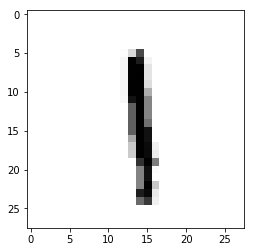

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 8
plt.imshow(X_train[image_index], cmap='Greys')

In [6]:
print(X_train.shape)
print(X_train[0].shape)

(60000, 28, 28)
(28, 28)


In [0]:
import numpy as np
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1)) 

In [0]:
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# input_shape = (28, 28, 1)
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [13]:
X_train.shape

(60000, 784)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
X_train/=255.
X_test/=255.

In [16]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 784)
X_test shape: (10000, 784)
Number of images in X_train 60000
Number of images in X_test 10000


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim = 784,activation = 'relu' ),
    tf.keras.layers.Dense(64,activation = 'relu'),
     tf.keras.layers.Dense(32,activation = 'relu'),
     tf.keras.layers.Dense(64,activation = 'relu'),
     tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(784,activation = 'sigmoid')
])


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history = model.fit(X_train, X_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0038 - acc: 0.8088 - val_loss: 0.0039 - val_acc: 0.8072
Epoch 2/25
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0038 - acc: 0.8088 - val_loss: 0.0039 - val_acc: 0.8072
Epoch 3/25
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0038 - acc: 0.8088 - val_loss: 0.0039 - val_acc: 0.8072
Epoch 4/25
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0038 - acc: 0.8088 - val_loss: 0.0039 - val_acc: 0.8072
Epoch 5/25
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0038 - acc: 0.8088 - val_loss: 0.0039 - val_acc: 0.8072
Epoch 6/25
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0038 - acc: 0.8088 - val_loss: 0.0038 - val_acc: 0.8072
Epoch 7/25
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0038 - acc: 0.8088 - val_loss: 0.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


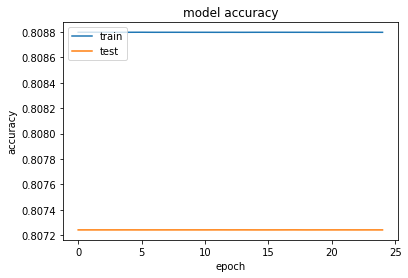

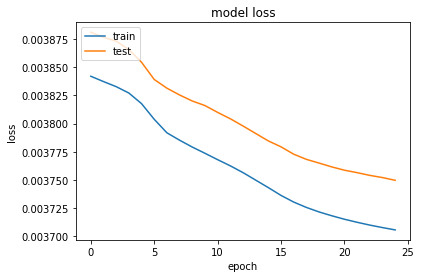

In [53]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
decoded_imgs = model.predict(X_test)

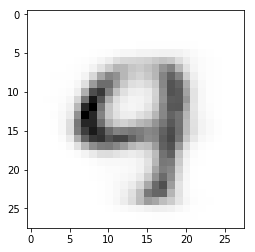

In [55]:
image_index = 4
plt.imshow(decoded_imgs[image_index].reshape(28,28), cmap='Greys')

In [56]:
decoded_imgs[0].shape

(784,)

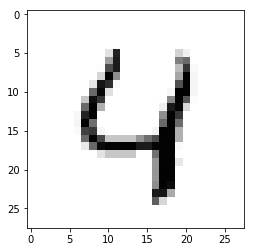

In [57]:
plt.imshow(X_test[image_index].reshape(28,28), cmap='Greys')

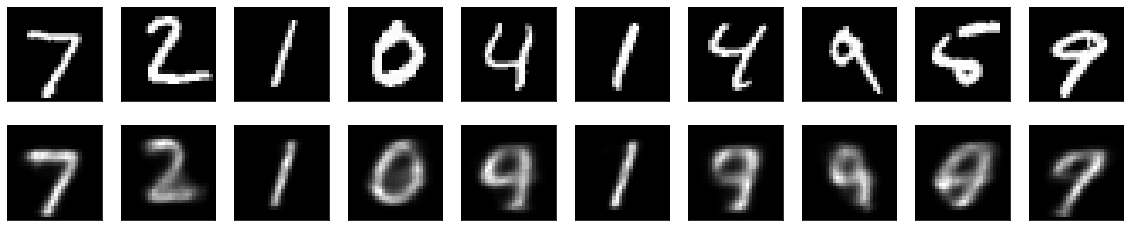

In [58]:

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [77]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim = 784,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(784,activation = 'sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history2 = model2.fit(X_train, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0414 - acc: 0.8076 - val_loss: 0.0040 - val_acc: 0.8072
Epoch 2/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0039 - acc: 0.8088 - val_loss: 0.0040 - val_acc: 0.8072
Epoch 3/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0039 - acc: 0.8088 - val_loss: 0.0040 - val_acc: 0.8072
Epoch 4/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0039 - acc: 0.8088 - val_loss: 0.0040 - val_acc: 0.8072
Epoch 5/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0039 - acc: 0.8088 - val_loss: 0.0039 - val_acc: 0.8072
Epoch 6/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0039 - acc: 0.8088 - val_loss: 0.0039 - val_acc: 0.8072
Epoch 7/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0039 - acc: 0.8088 - val_loss: 0.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


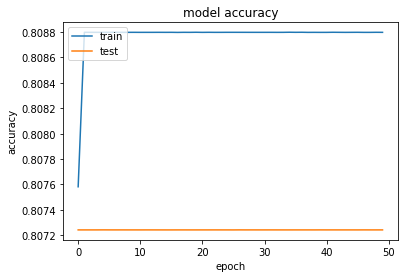

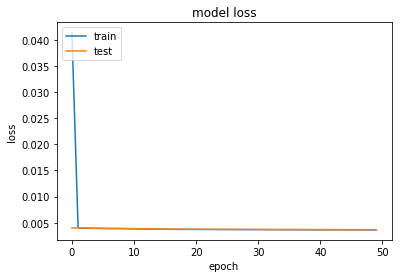

In [78]:
decoded_imgs2 = model2.predict(X_test)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

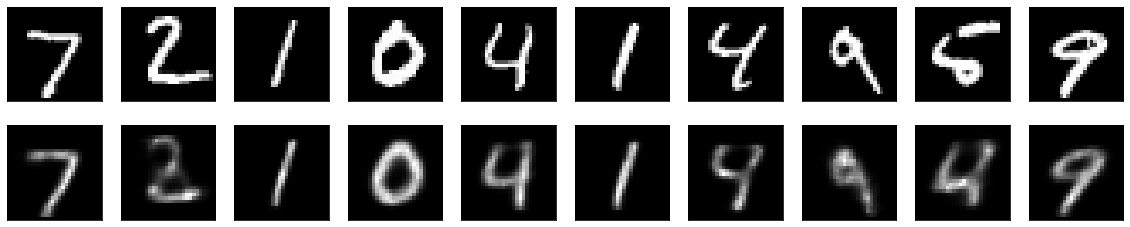

In [79]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()